## Notebook processes census data of higer education in US and then look for possible correlation between vaccination rate and education level in US counties
- PART 1: 

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import numpy as np

In [92]:
df_vax = pd.read_csv('input_data/COVID-19_Vaccinations_in_the_United_States_County.csv')

/home/joanna_len/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [93]:
fipses = list(df_vax['FIPS'])
fips_unq = list(set(fipses))
fips_unq.remove('UNK')

In [94]:
"""
urls = []
for fips in fips_unq:
    urls.append("https://data.census.gov/cedsci/profile?g=0500000US" + fips)
"""

'\nurls = []\nfor fips in fips_unq:\n    urls.append("https://data.census.gov/cedsci/profile?g=0500000US" + fips)\n'

In [95]:
#driver = webdriver.Firefox(executable_path="./drivers/geckodriver")

In [96]:
"""
p_edu = dict()
for fips in fips_unq:
    try:
        driver.get("https://data.census.gov/cedsci/profile?g=0500000US" + fips)
        time.sleep(10)
        content=driver.find_element_by_xpath("/html/body/div/div[3]/div/div/div[4]/div[2]/div[1]/div/div[3]/main/div[1]/div/div/div[1]/div[3]/div[3]/div[3]").text
        p_edu[fips] = float(content.replace('%',''))
    except:
        continue
"""

'\np_edu = dict()\nfor fips in fips_unq:\n    try:\n        driver.get("https://data.census.gov/cedsci/profile?g=0500000US" + fips)\n        time.sleep(10)\n        content=driver.find_element_by_xpath("/html/body/div/div[3]/div/div/div[4]/div[2]/div[1]/div/div[3]/main/div[1]/div/div/div[1]/div[3]/div[3]/div[3]").text\n        p_edu[fips] = float(content.replace(\'%\',\'\'))\n    except:\n        continue\n'

In [97]:
import pickle

In [98]:
"""
for x in list(p_edu.keys()):
    fips_unq.remove(x)
"""

'\nfor x in list(p_edu.keys()):\n    fips_unq.remove(x)\n'

In [99]:
"""
p_edu = dict()
for fips in fips_unq:
    try:
        driver.get("https://data.census.gov/cedsci/profile?g=0500000US" + fips)
        time.sleep(10)
        content=driver.find_element_by_xpath("/html/body/div/div[3]/div/div/div[4]/div[2]/div[1]/div/div[3]/main/div[1]/div/div/div[1]/div[3]/div[3]/div[3]").text
        p_edu[fips] = float(content.replace('%',''))
        with open('filename2.pickle', 'wb') as handle:
            pickle.dump(p_edu, handle, protocol=pickle.HIGHEST_PROTOCOL)
    except:
        continue
"""

'\np_edu = dict()\nfor fips in fips_unq:\n    try:\n        driver.get("https://data.census.gov/cedsci/profile?g=0500000US" + fips)\n        time.sleep(10)\n        content=driver.find_element_by_xpath("/html/body/div/div[3]/div/div/div[4]/div[2]/div[1]/div/div[3]/main/div[1]/div/div/div[1]/div[3]/div[3]/div[3]").text\n        p_edu[fips] = float(content.replace(\'%\',\'\'))\n        with open(\'filename2.pickle\', \'wb\') as handle:\n            pickle.dump(p_edu, handle, protocol=pickle.HIGHEST_PROTOCOL)\n    except:\n        continue\n'

In [100]:
#len(p_edu.keys())

In [101]:
with open('filename.pickle', 'rb') as handle:
    b1 = pickle.load(handle)

In [103]:
with open('filename2.pickle', 'rb') as handle:
    b2 = pickle.load(handle)

In [105]:
b2.update(b1)

In [123]:
y = list()
for fips in list(b2.keys()):
    y.append(df_vax.loc[(df_vax['FIPS'] == str(fips)) & (df_vax['Date'] == '06/01/2022')]['Series_Complete_Pop_Pct'].item())

In [160]:
x = list(b2.values())

In [164]:
y_new = list()
x_new = list()
for idx,i in enumerate(y):
    if (i >= 0):
        y_new.append(i)
        x_new.append(x[idx])
#ori_data.dropna(inplace=True)
x = x_new
y = y_new

In [181]:
m, b = np.polyfit(x, y, 1)
print(b)

37.2352345289618


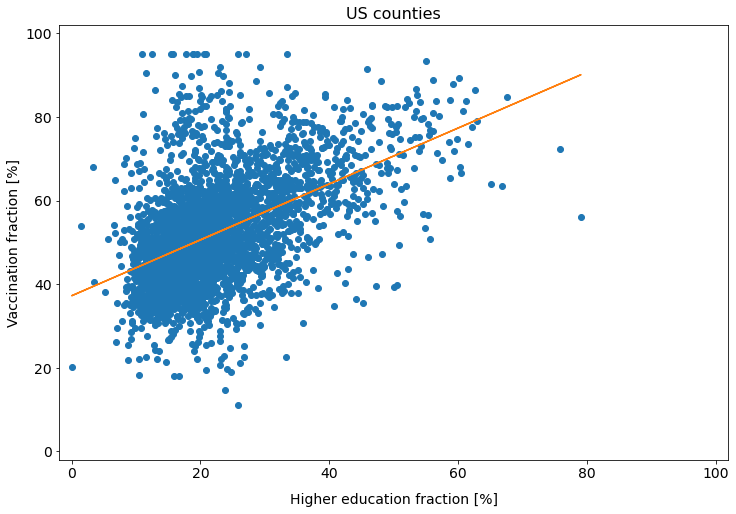

In [204]:
plt.plot(x, y, 'o')
plt.plot(x, m * np.array(x) + b)

plt.title("US counties", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Higher education fraction [%]", fontsize=14, labelpad=12)
plt.ylim([-2, 102])
plt.xlim([-2, 102])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [191]:
d = {'Higher education [x]':x, 'Vaccination [y]':y}
df = pd.DataFrame(d, columns=['Higher education [x]','Vaccination [y]'])

In [194]:
df.to_csv("data_higher_education_fullvax.csv")

In [195]:
df.to_excel("data_higher_education_fullvax.xlsx")  